In [1]:
import pandas as pd

import numpy as np

数据来源：
https://www.fixedincomeinvestor.co.uk/x/bondtable.html?groupid=4

In [3]:
bonds = pd.read_csv(r'/Users/paxton615/Desktop/CORPORATE_BONDS.csv')
bonds.head()

,CURRENCY,CURRENT_DATE,ISSUER,ISIN,COUPON,MATURITY,LIFE,PRICE,YTM
0,GBP,9-Aug-21,Natl Westminster Bank,XS0090254722,6.50%,7-Sep-21,1 mth,100.447,0.71%
1,GBP,9-Aug-21,Toyota Motor Credit Corp,XS1569850313,1.13%,7-Sep-21,1 mth,99.800,3.67%
2,GBP,9-Aug-21,European Investment Bank,XS1416470323,1.13%,7-Sep-21,1 mth,100.074,0.17%
3,GBP,9-Aug-21,Provident Financial plc,XS0900863084,6%,27-Sep-21,1 mth,99.250,11.46%
4,GBP,9-Aug-21,Goldman Sachs Group Inc,XS0270349003,5.50%,12-Oct-21,2 mths,100.822,0.76%


In [5]:
bonds[['COUPON','PRICE','YTM']].describe()

,PRICE
count,139.000000
mean,121.084453
std,20.015099
min,59.475000
25%,105.175000
50%,115.850000
75%,136.109500
max,215.875000


In [6]:
bonds['COUPON']=[float(i.replace('%','')) for i in bonds['COUPON']]

In [24]:
len(bonds.YTM)

139

In [25]:
bonds = bonds.dropna()

In [26]:
len(bonds.YTM)

135

In [30]:
bonds['YTM']=[float(i) for i in bonds['YTM']]

<ipython-input-30-d6365876bb98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bonds['YTM']=[float(i) for i in bonds['YTM']]


In [31]:
bonds.dtypes

CURRENCY         object
CURRENT_DATE     object
ISSUER           object
ISIN             object
COUPON          float64
MATURITY         object
LIFE             object
PRICE           float64
YTM             float64
dtype: object

In [29]:
bonds

,CURRENCY,CURRENT_DATE,ISSUER,ISIN,COUPON,MATURITY,LIFE,PRICE,YTM
0,GBP,9-Aug-21,Natl Westminster Bank,XS0090254722,6.50,7-Sep-21,1 mth,100.447,0.71
1,GBP,9-Aug-21,Toyota Motor Credit Corp,XS1569850313,1.13,7-Sep-21,1 mth,99.800,3.67
2,GBP,9-Aug-21,European Investment Bank,XS1416470323,1.13,7-Sep-21,1 mth,100.074,0.17
3,GBP,9-Aug-21,Provident Financial plc,XS0900863084,6.00,27-Sep-21,1 mth,99.250,11.46
4,GBP,9-Aug-21,Goldman Sachs Group Inc,XS0270349003,5.50,12-Oct-21,2 mths,100.822,0.76
...,...,...,...,...,...,...,...,...,...
131,GBP,9-Aug-21,Lloyds Bank plc,XS0543369184,6.50,17-Sep-40,19 yrs 1 mth,177.525,1.71
132,GBP,9-Aug-21,GE,XS0182703743,5.38,18-Dec-40,19 yrs 4 mths,148.044,2.28
133,GBP,9-Aug-21,HSBC Bank plc,XS0120514335,6.25,30-Jan-41,19 yrs 5 mths,161.240,2.31
134,GBP,9-Aug-21,Direct Line,XS0773947618,9.13,27-Apr-42,20 yrs 8 mths,105.929,8.50


- some outliers are very outstanding

In [32]:
bonds[['COUPON','PRICE','YTM']].describe()

,COUPON,PRICE,YTM
count,135.000000,135.000000,135.000000
mean,5.555889,121.550844,4.266444
std,1.539410,20.094897,32.180540
min,0.880000,59.475000,-42.620000
25%,5.045000,105.425000,0.825000
50%,5.750000,116.815000,1.510000
75%,6.190000,136.602000,2.315000
max,9.630000,215.875000,369.790000


In [34]:
import matplotlib as plt
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file

%config InlineBackend.figure_format = 'retina'

In [38]:
len(bonds)

135

- get rid off some outliers and plot

In [48]:
bonds_clean = bonds.loc[(bonds['YTM']<25)&(bonds['YTM']>0)&(bonds['PRICE']<180)&(bonds['PRICE']>70)]

In [49]:
len(bonds_clean)

128

In [59]:
bonds_clean[['COUPON','PRICE','YTM']].describe()

,COUPON,PRICE,YTM
count,128.000000,128.000000,128.000000
mean,5.621992,121.755188,2.031875
std,1.457295,17.623956,1.883879
min,0.880000,93.482000,0.170000
25%,5.130000,105.575000,0.877500
50%,5.750000,117.653500,1.520000
75%,6.130000,136.934250,2.312500
max,9.630000,177.525000,11.460000


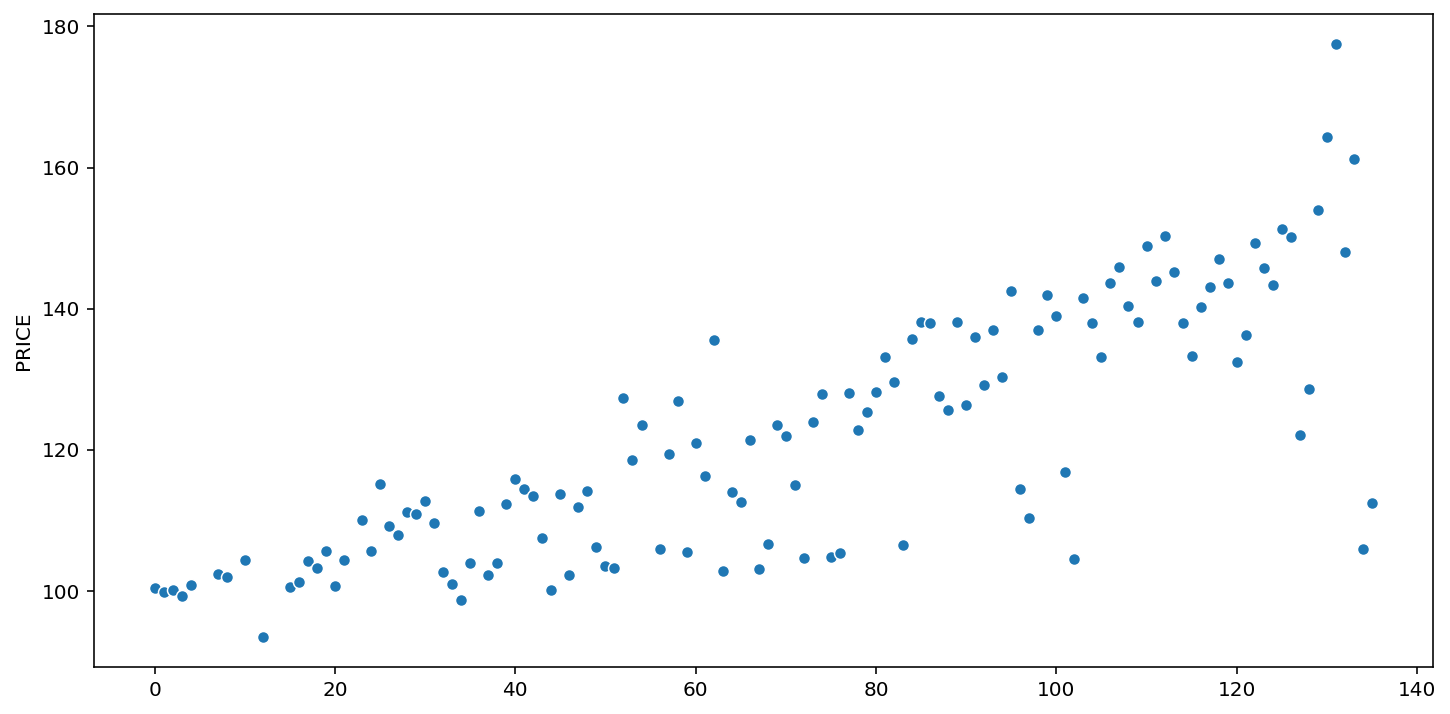

In [50]:
fig, ax = plt.subplots( figsize=(12,6))
sns.scatterplot(x=bonds_clean.index, y=bonds_clean.PRICE)
plt.show()

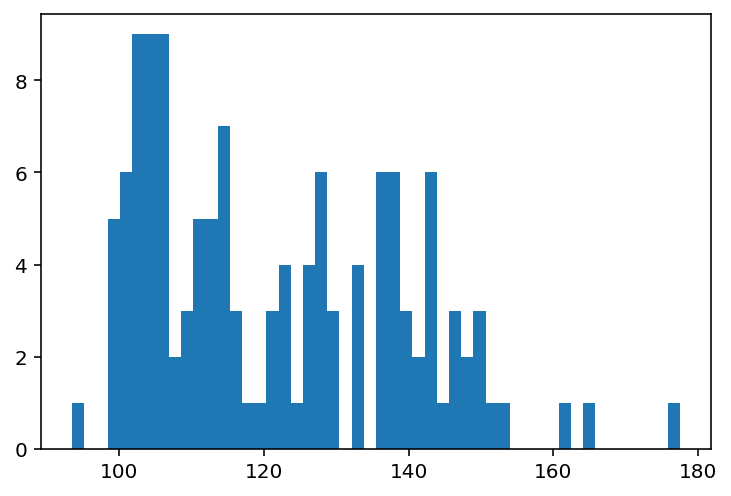

In [58]:
bonds_clean.PRICE.hist(grid=False, bins=50);

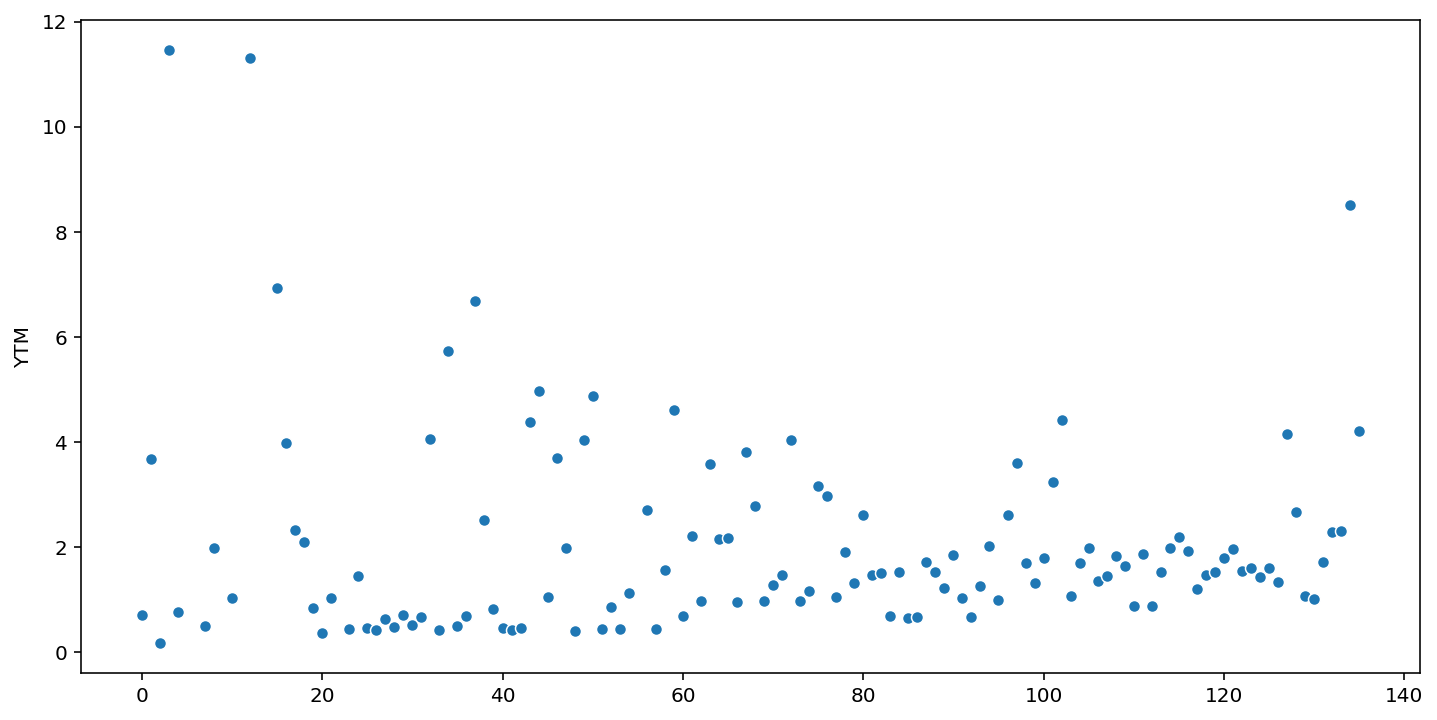

In [51]:
fig, ax = plt.subplots( figsize=(12,6))
sns.scatterplot(x=bonds_clean.index, y=bonds_clean.YTM)
plt.show()

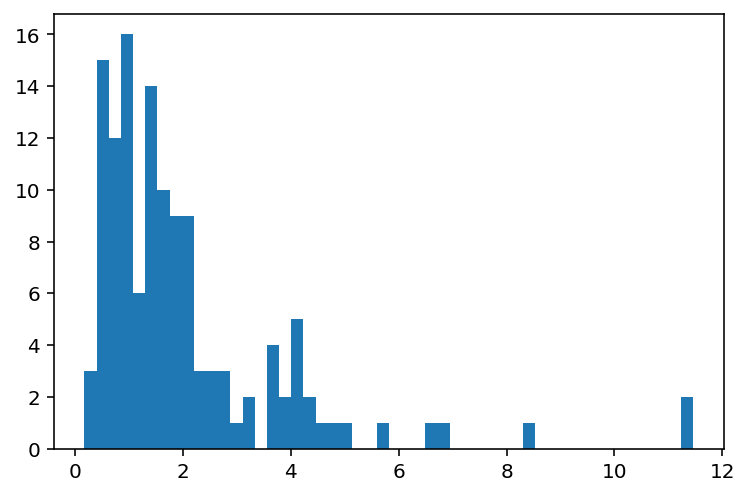

In [56]:
bonds_clean.YTM.hist(grid=False, bins=50);